### 이미지 데이터 전처리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os # Operating System : 파일이나 디렉토리 등 운영체제에서 제공되는 여러 기능을 파이썬에서 수행하게 해주는 라이브러리

from PIL import Image

In [3]:
j_dir = "주리비얀/"
p_dir = "팽도리/"
pi_dir = "피카츄/"

In [4]:
# listdir : 지정된 디렉토리 내의 모든 파일명을 리스트로 반환
j_fnames = os.listdir(j_dir)
p_fnames = os.listdir(p_dir)
pi_fnames = os.listdir(pi_dir)

In [6]:
test_path = os.path.join(j_dir, j_fnames[50])
test_path

'주리비얀/144.png'

In [7]:
# 폴더 경로와 파일명, 이미지 사이즈를 매개변수로 받아서 이미지를 불러와
# 배열로 만들어주는 사용자 정의함수 생성

def load_images(folder_path, file_names, img_size_shape=(224, 224)) :
    images = []
    for i in file_names :
        # 카테고리 별, 각 파일명들의 전체 경로를 설정
        path = os.path.join(folder_path, i)
        # 이미지를 경로에 맞게 불러와서 사이즈를 변경시키고 컬러이미지로 저장
        img = Image.open(path).resize(img_size_shape).convert('RGB')
        # 이미지를 배열로 변환시킨 데이터를 바로 비어있는 리스트에 저장
        images.append(np.array(img))
    # 리스트 자체도 배열로 변환시켜 반환
    return np.array(images)

In [8]:
train_j = load_images(j_dir, j_fnames)
train_p = load_images(p_dir, p_fnames)
train_pi = load_images(pi_dir, pi_fnames)

In [13]:
print(train_j.shape)
print(train_p.shape)
print(train_pi.shape)

# 3은 3채널 즉, 컬러 이미지를 뜻함

(400, 224, 224, 3)
(400, 224, 224, 3)
(399, 224, 224, 3)


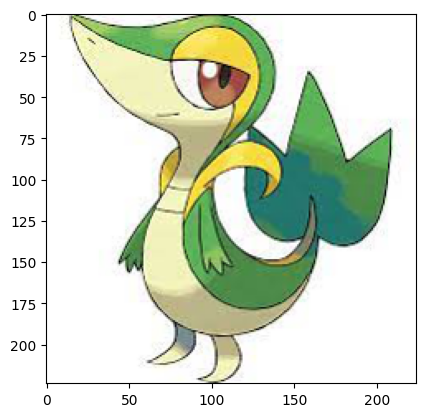

In [14]:
plt.imshow(train_j[0])

In [15]:
# 문제 데이터 생성(1200개 이미지 데이터 생성)
X = np.concatenate([train_j, train_p, train_pi])

In [18]:
# 정답 데이터 생성
# j : 0, p : 1, pi : 2
y = np.array([0]*400 + [1]*400 + [2]*399)
y.shape

(1199,)

In [19]:
print(X.shape, y.shape)

(1199, 224, 224, 3) (1199,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(959, 224, 224, 3)
(240, 224, 224, 3)
(959,)
(240,)


#### NPZ (Numpy Zip) 
- 배열 데이터를 압축해서 저장한 파일 형식

In [23]:
np.savez_compressed('pokemon.npz', # 저장될 경로 및 파일명 설정
                    X_train = X_train,
                    X_test = X_test,
                    y_train = y_train,
                    y_test = y_test
                   )